In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as sts

#to show all cols in df
from IPython.display import display
pd.options.display.max_columns = None



import warnings
warnings.simplefilter('ignore')


# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg' 


from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 15
plt.rcParams['image.cmap'] = 'viridis'

import seaborn as sns
%matplotlib inline


from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import xgboost


plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize'] = (10, 5)

In [2]:
 pd.options.display.max_rows = 200

In [3]:
data = pd.read_csv('data.csv', sep=';')

In [4]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### Работа с Null значениями

Разберемся с отсутствующими значениями. Так как данных немного, стратегия удаления строчек с нулевыми значениями не подойдет.

In [11]:
x_nl = data.isnull().sum()

In [12]:
x_nl[data.isnull().sum() > 1]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [13]:
data['LotFrontage'].head(3) #ширина жилья

0    65.0
1    80.0
2    68.0
Name: LotFrontage, dtype: float64

In [18]:
data.loc[data['Alley'].notnull(),'Alley'].head(5)

21    Grvl
30    Pave
56    Pave
79    Grvl
87    Pave
Name: Alley, dtype: object

In [21]:
data.loc[data['MiscFeature'].notnull(),'MiscFeature'].unique()

array(['Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [22]:
data.loc[data['Fence'].notnull(),'Fence'].unique() 

array(['MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

Удалим столбец 'MiscFeature' с категориальными данными, где больше 1400 пропущенно и который включает в себя различные признаки с описанием , он малоинформативен и достаточно тяжело будет его использовать в модели так, чтобы это принесло пользу, учитывая то, что в нем больше 1400 не заполнено.

In [6]:
сols_to_drop = ['MiscFeature']

In [7]:
data.drop(сols_to_drop,axis=1,inplace=True)

Другие сильно незаполненные категориальные признаки Alley PoolQC  Fence удалять не будем, хоть их немного, но они достаточно ощутимо могут повлиять на цену.Они достаточно информативны, чтобы даже не очень большим количеством повлиять на результаты. Заполним NaN в них значениями индикаторами об отсутсвии данного признака, чтобы потом моно было легко провести их кодирование в количественные переменные.

In [8]:
data['Alley'].fillna('No alley access', inplace=True)
data['PoolQC'].fillna('No Pool', inplace=True)
data['Fence'].fillna('No Fence', inplace=True)
data['FireplaceQu'].fillna('No FireplaceQu', inplace=True)

In [9]:
data['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

Заполним пропуски в годе постройки гаража средним значением

In [10]:
mean_garage_year = round(data['GarageYrBlt'].mean())

In [11]:
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(mean_garage_year)

Остальные категориальные переменные гаража заменим на No Garage

In [12]:
cols_obj_garage = [x for x in data.columns if 'Garage' in x and x != 'GarageYrBlt']

In [13]:
for x in data[cols_obj_garage].columns:
    data[x] = data[x].fillna('No Garage')

Теперь посмотрим на переменные Basement

In [14]:
basem_cols = [x for x in data.columns if 'Bsmt' in x]

In [15]:
data[basem_cols].isnull().sum() 

BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinSF1       0
BsmtFinType2    38
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
BsmtFullBath     0
BsmtHalfBath     0
dtype: int64

In [16]:
data['MasVnrArea'].dtype

dtype('float64')

In [17]:
for x in ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']:
    data[x] = data[x].fillna('No Bsmt')

Заменим MasVnrArea на 0, так как в этом столбце много 0, которые видимо обозначает ее отсутсвие. Можем предположить, что np.nan в этом столбце может обозначать тоже самое

In [18]:
data['MasVnrArea'] = data['MasVnrArea'].replace(np.nan,0)

In [19]:
data['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [20]:
data['MasVnrType'] = data['MasVnrType'].replace(np.nan,'None')

In [21]:
data['LotFrontage'].fillna(data['LotFrontage'].mean(),inplace=True)

### Анализ корреляции и взаимосвязей

In [22]:
corr = data.corr(method='pearson')

In [23]:
corr[abs(corr) > 0.7]

Id  MSSubClass  LotFrontage  LotArea  OverallQual  \
Id             1.0         NaN          NaN      NaN          NaN   
MSSubClass     NaN         1.0          NaN      NaN          NaN   
LotFrontage    NaN         NaN          1.0      NaN          NaN   
LotArea        NaN         NaN          NaN      1.0          NaN   
OverallQual    NaN         NaN          NaN      NaN          1.0   
OverallCond    NaN         NaN          NaN      NaN          NaN   
YearBuilt      NaN         NaN          NaN      NaN          NaN   
YearRemodAdd   NaN         NaN          NaN      NaN          NaN   
MasVnrArea     NaN         NaN          NaN      NaN          NaN   
BsmtFinSF1     NaN         NaN          NaN      NaN          NaN   
BsmtFinSF2     NaN         NaN          NaN      NaN          NaN   
BsmtUnfSF      NaN         NaN          NaN      NaN          NaN   
TotalBsmtSF    NaN         NaN          NaN      NaN          NaN   
1stFlrSF       NaN         NaN          NaN      NaN          NaN   
2ndFlrSF       NaN         NaN          NaN      NaN          NaN   
LowQualFinSF   NaN         NaN          NaN      NaN          NaN   
GrLivArea      NaN         NaN          NaN      NaN          NaN   
BsmtFullBath   NaN         NaN          NaN      NaN          NaN   
BsmtHalfBath   NaN         NaN          NaN      NaN          NaN   
FullBath       NaN         NaN          NaN      NaN          NaN   
HalfBath       NaN         NaN          NaN      NaN          NaN   
BedroomAbvGr   NaN         NaN          NaN      NaN          NaN   
KitchenAbvGr   NaN         NaN          NaN      NaN          NaN   
TotRmsAbvGrd   NaN         NaN          NaN      NaN          NaN   
Fireplaces     NaN         NaN          NaN      NaN          NaN   
GarageYrBlt    NaN         NaN          NaN      NaN          NaN   
GarageCars     NaN         NaN          NaN      NaN          NaN   
GarageArea     NaN         NaN          NaN      NaN          NaN   
WoodDeckSF     NaN         NaN          NaN      NaN          NaN   
OpenPorchSF    NaN         NaN          NaN      NaN          NaN   
EnclosedPorch  NaN         NaN          NaN      NaN          NaN   
3SsnPorch      NaN         NaN          NaN      NaN          NaN   
ScreenPorch    NaN         NaN          NaN      NaN          NaN   
PoolArea       NaN         NaN          NaN      NaN          NaN   
MiscVal        NaN         NaN          NaN      NaN          NaN   
MoSold         NaN         NaN          NaN      NaN          NaN   
YrSold         NaN         NaN          NaN      NaN          NaN   
SaleCategory   NaN         NaN          NaN      NaN          NaN   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                     NaN        NaN           NaN         NaN         NaN   
MSSubClass             NaN        NaN           NaN         NaN         NaN   
LotFrontage            NaN        NaN           NaN         NaN         NaN   
LotArea                NaN        NaN           NaN         NaN         NaN   
OverallQual            NaN        NaN           NaN         NaN         NaN   
OverallCond            1.0        NaN           NaN         NaN         NaN   
YearBuilt              NaN   1.000000           NaN         NaN         NaN   
YearRemodAdd           NaN        NaN           1.0         NaN         NaN   
MasVnrArea             NaN        NaN           NaN         1.0         NaN   
BsmtFinSF1             NaN        NaN           NaN         NaN         1.0   
BsmtFinSF2             NaN        NaN           NaN         NaN         NaN   
BsmtUnfSF              NaN        NaN           NaN         NaN         NaN   
TotalBsmtSF            NaN        NaN           NaN         NaN         NaN   
1stFlrSF               NaN        NaN           NaN         NaN         NaN   
2ndFlrSF               NaN        NaN           NaN         NaN         NaN   
LowQualFinSF           NaN        NaN           NaN         

In [24]:
# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png' 


In [86]:
plt.figure(figsize=(20,20))
# Create a mask to hide the upper triangle of the correlation matrix (which is symmetric)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True



sns.heatmap(corr, mask=mask, vmax=1, center=0, annot=True, fmt='.1f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

Визуализируем взаимосвязи между целевой переменной и теми, между которыми есть наибольшая корреляция

In [99]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


Выборочно посмотрим распределенеие и взаимосвязи некоторых признаков

Можем видеть, что классы целевой переменной несбалансированы, надо будет впоследствии применять стратифицированное разбиение на тестовую и тренировочные выборки. Среднее качество жилья в целом невосокое('OverallQual'), около 5, все жилье продавалось в основном между 2006 и 2010 годом. Скорее всего, имеем дело с жильем преимущественно в средней ценовой категории.

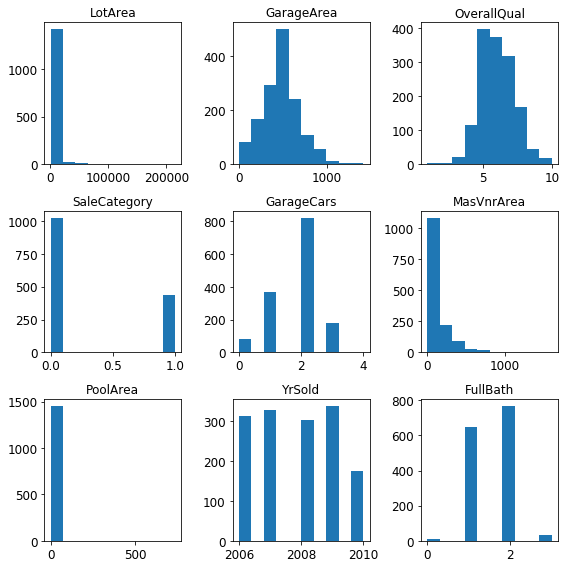

<Figure size 360x360 with 0 Axes>

In [109]:
fig, axes = plt.subplots(3,3,figsize=(8,8))
for col, ax in zip(['LotArea','GarageArea','OverallQual','SaleCategory','GarageCars','MasVnrArea','PoolArea','YrSold','FullBath'],axes.flat):
    ax.hist(data[col])
    ax.set_title(col)
plt.tight_layout()
plt.figure(figsize=(5,5));

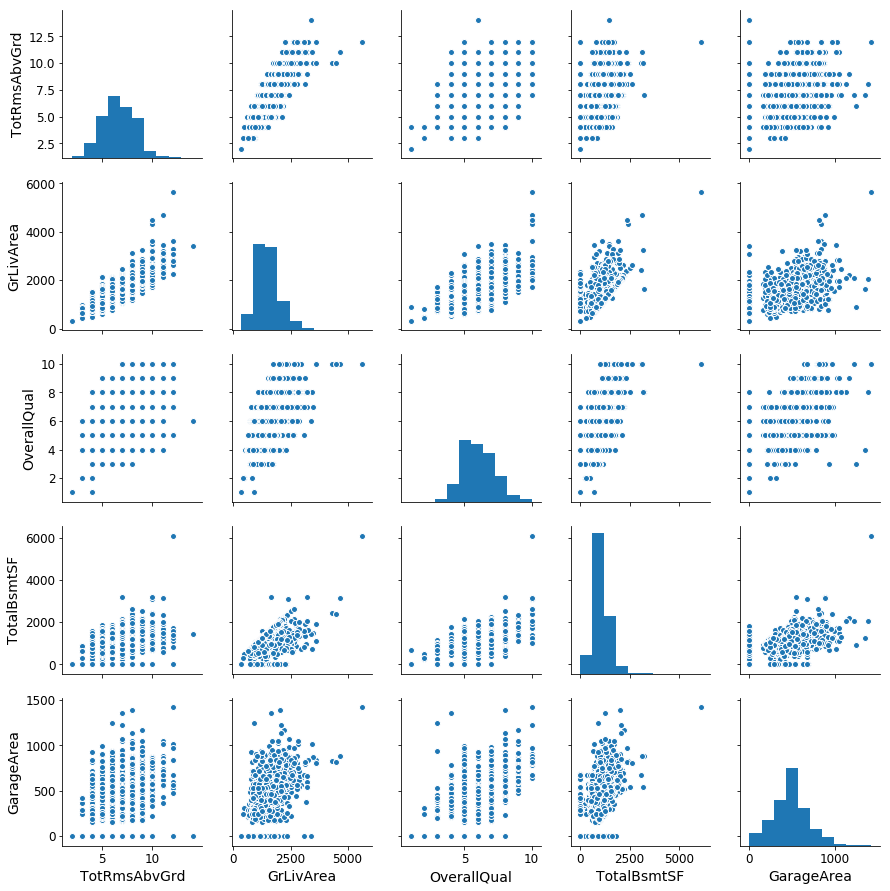

In [94]:
%config InlineBackend.figure_format = 'png' 
sns.pairplot(data[['TotRmsAbvGrd','GrLivArea',
                   'OverallQual', 
                'TotalBsmtSF','GarageArea']]);

Можем видеть, что многие признаки коррелируют между собой. Например, количество машин в гараже зависит от его общей площади,оценка общего качества дома сильно зависит от других количественных покаателей жилья. Для простоты расчетов оставим их в модели и будем проводить дальнейшие расчеты с ними

### Разбираемся с категориальными переменными

In [110]:
сategorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']

In [111]:
сategorical_columns

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'SaleType',
 'SaleCondition']

In [114]:
for x in сategorical_columns:
    data = pd.concat([data, pd.get_dummies(data[x], prefix=x)], axis=1)
    data = data.drop(x, axis=1)

In [116]:
data.head(1)

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   

   SaleCategory  MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0             1                 0            0            0            1   

   MSZoning_RM  Street_Grvl  Street_Pave  Alley_Grvl  Alley_No alley access  \
0            0            0            1           0                      1   

   Alley_Pave  LotShape_IR1  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0           0             0             0             0             1   

   LandContour_Bnk  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
0                0                0                0                1   

   Utilities_AllPub  Utilities_NoSeWa  LotConfig_Corner  LotConfig_CulDSac  \
0                 1                 0                 0                  0   

   LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Gtl  \
0              0              0                 1              1   

   LandSlope_Mod  LandSlope_Sev  Neighborhood_Blmngtn  Neighborhood_Blueste  \
0              0              0                     0                     0   

   Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
0                    0                     0                     0   

   Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
0                     1                     0                     0   

   Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  \
0                     0                    0                     0   

   Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  \
0                     0                   0                     0   

   Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  \
0                    0                     0                     0   

   Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  \
0                     0                   0                    0   

   Neighborhood_SawyerW  Neighborhood_Somerst  Neighborhood_StoneBr  \
0                     0                     0                     0   

   Neighborhood_Timber  Neighborhood_Veenker  Condition1_Artery  \
0                    0                     0                  0   

   Condition1_Feedr  Condition1_Norm  Condition1_PosA  Condition1_PosN  \
0                 0                1                0                0   

   Condition1_RRAe  Condition1_RRAn  Condition1_RRNe  Condition1_RRNn  \
0                0                0                0                0   

   Condition2_Artery  Condition2_Feedr  Condition2_Norm  Condition2_PosA  \
0                  0                 0                1                0   

   Condition2_PosN  Condition2_RRAe  Condition2_RRAn  Condition2_RRNn  \
0                0                0                0                0   

   BldgType_1Fam  BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  \
0              1                0                0               0   

   BldgType_TwnhsE  HouseStyle_1.5Fin  HouseStyle_1.5Unf  HouseStyle_1Story  \
0                0                  0                  0                  0   

Удаляем дублирующиеся закодированные категориальные переменные, которые обозначают отсутствие признака 

In [25]:
col_no = [x for x in data.columns if 'No' in x]

In [118]:
col_no

['Alley_No alley access',
 'Utilities_NoSeWa',
 'Neighborhood_NoRidge',
 'Condition1_Norm',
 'Condition2_Norm',
 'MasVnrType_None',
 'BsmtQual_No Bsmt',
 'BsmtCond_No Bsmt',
 'BsmtExposure_No',
 'BsmtExposure_No Bsmt',
 'BsmtFinType1_No Bsmt',
 'BsmtFinType2_No Bsmt',
 'FireplaceQu_No FireplaceQu',
 'GarageType_No Garage',
 'GarageFinish_No Garage',
 'GarageQual_No Garage',
 'GarageCond_No Garage',
 'PoolQC_No Pool',
 'Fence_No Fence',
 'SaleCondition_Normal']

In [119]:
data.drop(['BsmtFinType1_No Bsmt','BsmtCond_No Bsmt','BsmtFinType2_No Bsmt','BsmtQual_No Bsmt','GarageCond_No Garage','GarageQual_No Garage','GarageFinish_No Garage'],axis=1,inplace=True)

In [120]:
col_no = [x for x in data.columns if 'No' in x]

In [121]:
col_no

['Alley_No alley access',
 'Utilities_NoSeWa',
 'Neighborhood_NoRidge',
 'Condition1_Norm',
 'Condition2_Norm',
 'MasVnrType_None',
 'BsmtExposure_No',
 'BsmtExposure_No Bsmt',
 'FireplaceQu_No FireplaceQu',
 'GarageType_No Garage',
 'PoolQC_No Pool',
 'Fence_No Fence',
 'SaleCondition_Normal']

In [122]:
data.drop(['BsmtExposure_No Bsmt'],axis=1, inplace=True)

### Сокращение размерности с помощью PCA

In [123]:
from sklearn.decomposition import PCA

In [142]:
y = data['SaleCategory'].copy()
x = data.drop('SaleCategory',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y,stratify=y, test_size=0.3, random_state=42)

In [143]:
scaler = StandardScaler()
x_scaled = scaler.fit(x_train)
x_train_scaled=  x_scaled.transform(x_train)
x_test_scaled = x_scaled.transform(x_test)

Попробуем вначале визуализировать данные при помощи только двух компонент, чтобы примерно понимать характер взаимосвязи переменных (линейный/нелинейный)

In [136]:
pca = PCA(n_components=2)

In [137]:
pca.fit(x_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [138]:
X_pca = pca.transform(x_train_scaled)

In [139]:
plt.figure(figsize=(8,8))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y_train)
plt.gca().set_aspect('equal')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')

Text(0,0.5,'Вторая главная компонента')

In [140]:
for i in range(1, X_pca.shape[1] + 1):
    print("n-components=%s, explained variance %.3f" % (i, sum(pca.explained_variance_ratio_[:i])))

n-components=1, explained variance 0.068
n-components=2, explained variance 0.100


In [141]:
pca = PCA(n_components=50)

In [144]:
pca.fit(x_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [145]:
X_pca = pca.transform(x_train_scaled)

In [146]:
for i in range(1, X_pca.shape[1] + 1):
    print("n-components=%s, explained variance %.3f" % (i, sum(pca.explained_variance_ratio_[:i])))

n-components=1, explained variance 0.068
n-components=2, explained variance 0.100
n-components=3, explained variance 0.126
n-components=4, explained variance 0.147
n-components=5, explained variance 0.165
n-components=6, explained variance 0.181
n-components=7, explained variance 0.197
n-components=8, explained variance 0.211
n-components=9, explained variance 0.224
n-components=10, explained variance 0.237
n-components=11, explained variance 0.249
n-components=12, explained variance 0.262
n-components=13, explained variance 0.273
n-components=14, explained variance 0.284
n-components=15, explained variance 0.295
n-components=16, explained variance 0.305
n-components=17, explained variance 0.315
n-components=18, explained variance 0.326
n-components=19, explained variance 0.335
n-components=20, explained variance 0.345
n-components=21, explained variance 0.354
n-components=22, explained variance 0.363
n-components=23, explained variance 0.371
n-components=24, explained variance 0.380
n

50 компоненты объяснили больше 50% дисперсии в данных

In [150]:
data.shape[1]

291

In [151]:
y = data['SaleCategory'].copy()
x = data.drop('SaleCategory',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y,stratify=y, test_size=0.3, random_state=42)

scaler = StandardScaler()
x_scaled = scaler.fit(x_train)
x_train_scaled=  x_scaled.transform(x_train)
x_test_scaled = x_scaled.transform(x_test)

pca = PCA(n_components=150)
pca.fit(x_train_scaled)
X_pca = pca.transform(x_train_scaled)

for i in range(1, X_pca.shape[1] + 1):
    print("n-components=%s, explained variance %.3f" % (i, sum(pca.explained_variance_ratio_[:i])))

n-components=1, explained variance 0.068
n-components=2, explained variance 0.100
n-components=3, explained variance 0.126
n-components=4, explained variance 0.147
n-components=5, explained variance 0.165
n-components=6, explained variance 0.181
n-components=7, explained variance 0.197
n-components=8, explained variance 0.211
n-components=9, explained variance 0.224
n-components=10, explained variance 0.237
n-components=11, explained variance 0.249
n-components=12, explained variance 0.262
n-components=13, explained variance 0.273
n-components=14, explained variance 0.284
n-components=15, explained variance 0.295
n-components=16, explained variance 0.305
n-components=17, explained variance 0.316
n-components=18, explained variance 0.326
n-components=19, explained variance 0.335
n-components=20, explained variance 0.345
n-components=21, explained variance 0.354
n-components=22, explained variance 0.363
n-components=23, explained variance 0.372
n-components=24, explained variance 0.380
n

А вот 150 главных компонент объясняют уже больше 90% дисперсии. Это больше чем на 100 переменных меньше, чем в исходных данных.

Text(0,0.5,'explained_variance_ratio_')

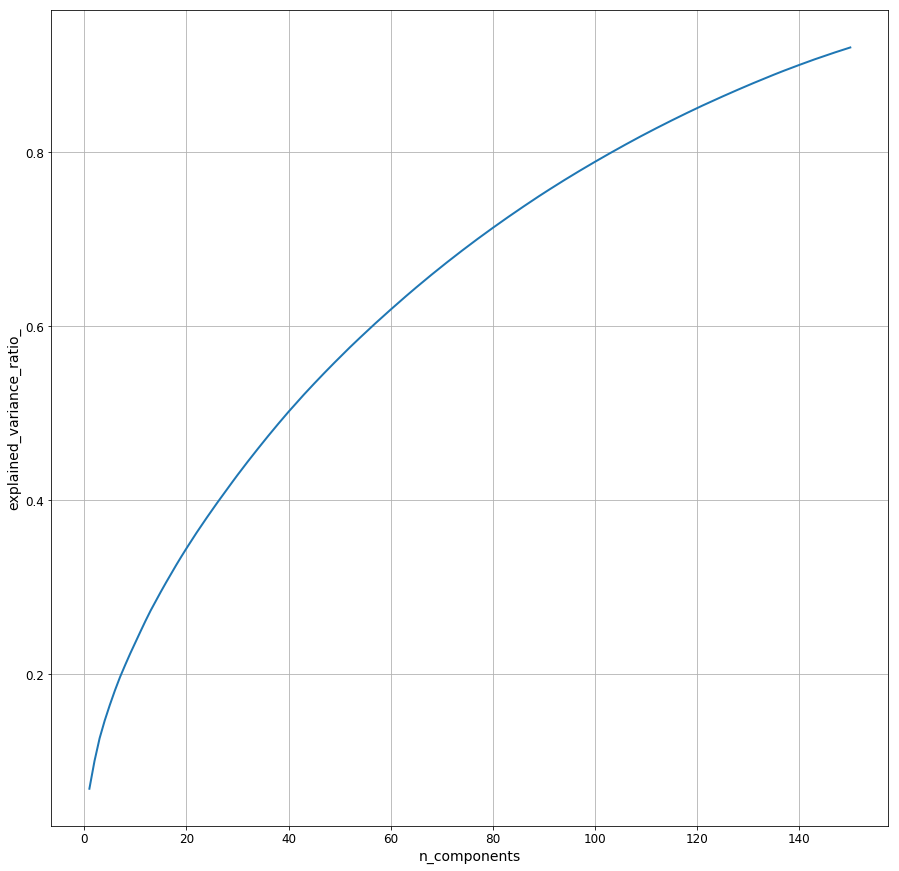

In [152]:
cum_evr = np.cumsum(pca.explained_variance_ratio_)
xs = np.arange(cum_evr.size) + 1
plt.plot(xs, cum_evr, linewidth=2)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

In [179]:
y = data['SaleCategory'].copy()
x = data.drop('SaleCategory',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y,stratify=y, test_size=0.3, random_state=42)

scaler = StandardScaler()
x_scaled = scaler.fit(x_train)
x_train_scaled=  x_scaled.transform(x_train)
x_test_scaled = x_scaled.transform(x_test)

pca = PCA(n_components=220)
pca.fit(x_train_scaled)
X_pca = pca.transform(x_train_scaled)

for i in range(1, X_pca.shape[1] + 1):
    print("n-components=%s, explained variance %.3f" % (i, sum(pca.explained_variance_ratio_[:i])))

n-components=1, explained variance 0.068
n-components=2, explained variance 0.100
n-components=3, explained variance 0.126
n-components=4, explained variance 0.147
n-components=5, explained variance 0.165
n-components=6, explained variance 0.181
n-components=7, explained variance 0.197
n-components=8, explained variance 0.211
n-components=9, explained variance 0.224
n-components=10, explained variance 0.237
n-components=11, explained variance 0.249
n-components=12, explained variance 0.262
n-components=13, explained variance 0.273
n-components=14, explained variance 0.284
n-components=15, explained variance 0.295
n-components=16, explained variance 0.305
n-components=17, explained variance 0.316
n-components=18, explained variance 0.326
n-components=19, explained variance 0.335
n-components=20, explained variance 0.345
n-components=21, explained variance 0.354
n-components=22, explained variance 0.363
n-components=23, explained variance 0.372
n-components=24, explained variance 0.380
n

Text(0,0.5,'explained_variance_ratio_')

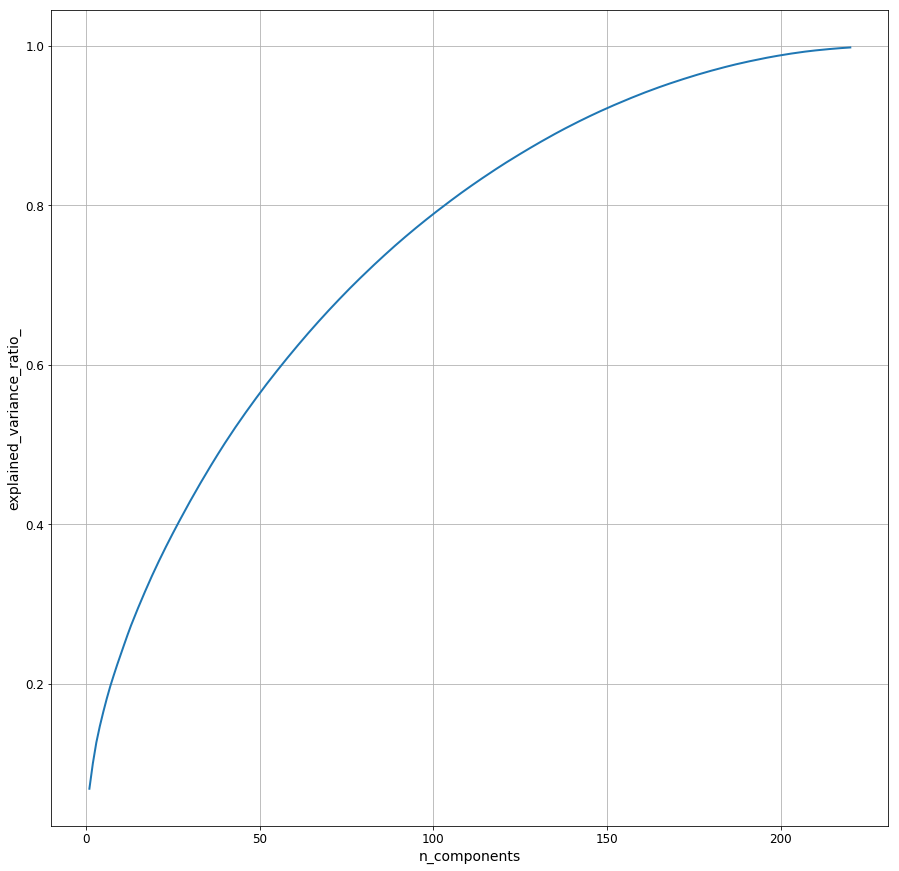

In [157]:
cum_evr = np.cumsum(pca.explained_variance_ratio_)
xs = np.arange(cum_evr.size) + 1
plt.plot(xs, cum_evr, linewidth=2)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

220 переменных объяснили практически 100% дисперсии. Оставим этот вариант

In [180]:
X_train_pca = X_pca
X_test_pca = pca.transform(x_test_scaled)

### Кросс валиация данных

In [159]:
from sklearn.model_selection import cross_val_score

In [173]:
x = X_train_pca.copy()
y = y_train.copy()
logreg = LogisticRegression()
scores = cross_val_score(logreg,x,y,cv=5)

In [174]:
scores

array([0.89268293, 0.87317073, 0.87745098, 0.91666667, 0.91666667])

In [162]:
scores.mean()

0.895327594452415

Таким образом, мы можем видеть, что обобщающая способность нашей модели достаточно высока, разброс оценок невелик,это значит, что качество нашей модели не сильно зависит от разбиения данных.

### Построение модели

In [163]:
from sklearn.svm import SVC

In [176]:
x = X_train_pca.copy()
y = y_train.copy()
svm = SVC(kernel='rbf',random_state = 0, gamma = 90.0, C=100.0)
svm.fit(x,y)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=90.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [177]:

svm.score(X_test_pca,y_test)

0.7031963470319634

In [167]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [181]:
rf = RandomForestClassifier(n_estimators=150, random_state=11)
rf.fit(x, y)
rf.score(x_t,y_t)

0.8858447488584474

In [182]:
score = LogisticRegression().fit(x,y).score(x_t, y_t)
score

0.91324200913242

In [183]:
xgb = xgboost.XGBClassifier(max_depth=4, n_jobs=-1)
xgb.fit(x, y)
y_train_predict = xgb.predict_proba(x)[:, 1]
y_test_predict = xgb.predict_proba(x_t)[:, 1]
roc_auc_train = np.round(roc_auc_score(y, y_train_predict), 2)
roc_auc_test = np.round(roc_auc_score(y_t, y_test_predict), 2)
print("Train: ", roc_auc_train)
print("Test: ", roc_auc_test)

Train:  1.0
Test:  0.98


In [185]:
xgb.score(x_t,y_t)

0.9269406392694064

XGBClassifier дает лучшие результаты из всех моделей

### Проверим качество на первоначальных данных

In [187]:
y = data['SaleCategory'].copy()
x = data.drop('SaleCategory',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y,stratify=y, test_size=0.3, random_state=42)

In [188]:
x = x_train.copy()
y = y_train.copy()
x_t = x_test.copy()
y_t = y_test.copy()

xgb = xgboost.XGBClassifier(max_depth=4, n_jobs=-1)
xgb.fit(x, y)
y_train_predict = xgb.predict_proba(x)[:, 1]
y_test_predict = xgb.predict_proba(x_t)[:, 1]
roc_auc_train = np.round(roc_auc_score(y, y_train_predict), 2)
roc_auc_test = np.round(roc_auc_score(y_t, y_test_predict), 2)
print("Train: ", roc_auc_train)
print("Test: ", roc_auc_test)

Train:  1.0
Test:  0.98


In [189]:
xgb.score(x_t,y_t)

0.9315068493150684

Качество на первоначальных данных даже выше, чем при использовании главных компонент.

In [190]:
score = LogisticRegression().fit(x,y).score(x_t, y_t)
score

0.9223744292237442

Также и для логистической регрессии.